In [1]:
import requests
import json
from pprint import pprint
import datetime
import base64
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from urllib.parse import urlparse
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

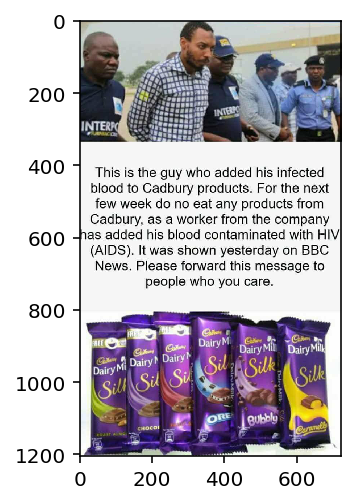

In [2]:
im_dir = "fake.jpg"
img = mpimg.imread(im_dir)
plt2 = plt.imshow(img)

In [3]:
with open(im_dir, "rb") as image_file:
    post_data = {"imageData": base64.b64encode(image_file.read()).decode('utf-8'),
            "x": "0",
            "y": "0",
            "width": "0",
            "height": "0",
            "scaleX": "0",
            "scaleY": "0",
            "rotate": "0",
            "num_results": "10",
            "lang": "en"}

In [4]:
r = requests.post('http://localhost:9000', json.dumps(post_data))
json_output = r.json()

In [5]:
#json_output

In [6]:
counts_country = {}
counts_domain = {}
keywords = {}
unix_times = []

for result in json_output["full_matches"]:
    try: counts_country[result["country"]] += 1
    except: counts_country[result["country"]] = 1
    page_url = result["page_url"]
    domain = str(urlparse(page_url).netloc).replace(".", "_")
    try: counts_domain[domain] += 1
    except: counts_domain[domain] = 1
    unix_times.append(result["unix_time"])
    for keyword in result["page_keywords"]:
        try: keywords[keyword] += 1
        except: keywords[keyword] = 1
    
    
for result in json_output["partial_matches"]:
    try: counts_country[result["country"]] += 1
    except: counts_country[result["country"]] = 1
    page_url = result["page_url"]
    domain = str(urlparse(page_url).netloc).replace(".", "_")+"__"+(result["country"].replace(" ", ""))
    try: counts_domain[domain] += 1
    except: counts_domain[domain] = 1
    unix_times.append(result["unix_time"])
    for keyword in result["page_keywords"]:
        try: keywords[keyword] += 1
        except: keywords[keyword] = 1

In [7]:
print("Best guess label:", json_output["best_guess"])
print("")
print("OCR:\n", json_output["image_text"])
print("")
print("Country Appearances:")
pprint(counts_country)
print("")
print("Domain Appearances:")
pprint(counts_domain)
print("")
print("Keywords Appearances:")
print([word for word in keywords.keys() if keywords[word]>1])
print("")

first = min(unix_times)
print("First Appearance:", datetime.datetime.fromtimestamp(int(first)).strftime('%Y-%m-%d %H:%M:%S'))
print("")

for result in json_output["full_matches"]:
    if result["unix_time"] < (first + 10):
        pprint(result)
        print("")
    
for result in json_output["partial_matches"]:
    if result["unix_time"] < (first + 10):
        pprint(result)
        print("")

Best guess label: ['cadbury hiv']

OCR:
 ['This is the guy who added his infected\nblood to Cadbury products. For the next\nfew week do no eat any products from\nCadbury, as a worker from the company\nhas added his blood contaminated with HIV\n(AIDS). It was shown yesterday on BBC\nNews. Please forward this message to\npeople who you care\nREE\nDairy Mill DairyM\nairy Mi Dairyh Dairy\nCHOCOI\n']

Country Appearances:
{'United States': 6}

Domain Appearances:
{'smhoaxslayer_com': 1,
 'twitter_com__UnitedStates': 1,
 'www_ksdk_com__UnitedStates': 1,
 'www_snopes_com': 1,
 'www_truthorfiction_com': 2}

Keywords Appearances:
['infected', 'products', 'eggs', 'blood', 'cadbury', 'worker', 'hoax', 'contaminated', 'hiv', 'false']

First Appearance: 2018-03-06 19:37:33

{'country': 'United States',
 'image_url': 'https://pbs.twimg.com/media/DXoRnj8W0AEViy5.jpg',
 'page_keywords': ['locationyou',
                   'learn',
                   'tweets',
                   'thirdparty',
          